<a href="https://colab.research.google.com/github/AdrianoHKim/WebScrapSelic/blob/main/SelicWebScraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
             SELIC     ITUB4     EMBR3     VALE3
data                                            
2010-02-01  1.0059  1.010241  0.981982  1.031486
2010-03-01  1.0076  1.068493  1.072375  1.132805
2010-04-01  1.0067  0.966667  0.969582  0.929134
2010-05-01  1.0075  0.920424  0.962945  0.948301
2010-06-01  1.0079  0.936898  0.951794  0.873000
2010-07-01  1.0086  1.218575  1.243242  1.112256
2010-08-01  1.0089  0.955645  0.939948  0.965602
2010-09-01  1.0085  1.076278  1.093518  1.115615
2010-10-01  1.0081  1.025777  1.027573  1.024856
2010-11-01  1.0081  0.946064  1.023121  1.008104
2010-12-01  1.0093  1.014052  0.952381  1.033047
2011-01-01  1.0086  0.894718  1.164939  1.031628


<Axes: title={'center': 'Correlação do Retorno Acumulado'}>

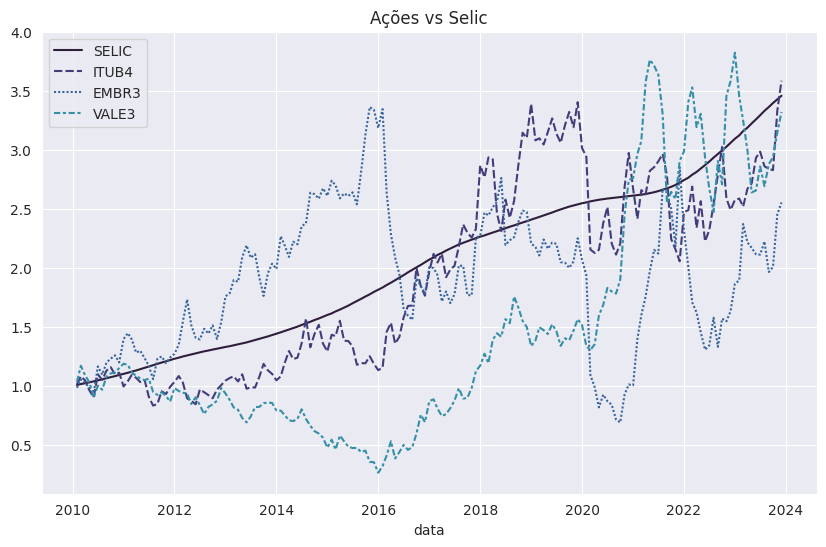

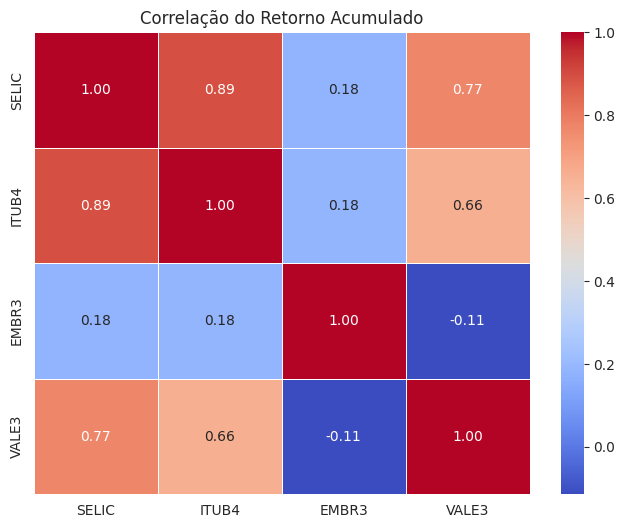

In [1]:
import pandas as pd  # Importa a biblioteca pandas com o alias 'pd'
import matplotlib.pyplot as plt  # Importa a biblioteca matplotlib.pyplot com o alias 'plt'
import yfinance as yf  # Importa a biblioteca yfinance com o alias 'yf'
import seaborn as sns  # Importa a biblioteca seaborn com o alias 'sns'

# Define uma função para extrair dados do Banco Central do Brasil
def extracao_bcb(codigo, data_inicio, data_fim):
    # Constrói a URL para a API do BCB com base nos parâmetros fornecidos
    url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/' \
          'dados?formato=json&dataInicial={}&dataFinal={}'.format(codigo, data_inicio, data_fim)

    # Lê os dados JSON da URL para um DataFrame do pandas
    df = pd.read_json(url)

    # Define a coluna 'data' como índice e converte para o formato de data
    df.set_index('data', inplace=True)
    df.index = pd.to_datetime(df.index, dayfirst=True)

    # Renomeia as colunas do DataFrame
    df.columns = ['SELIC']

    # Converte os valores da coluna 'SELIC' para a escala percentual dividindo por 100
    df['SELIC'] = df['SELIC'] / 100

    # Retorna o DataFrame resultante
    return df

# Chama a função extracao_bcb para obter dados sobre a taxa SELIC
dados = extracao_bcb(4390, '01/01/2010', '31/12/2023')

# Lista de ativos para os quais serão baixados dados do Yahoo Finance
ativos = ['ITUB4', 'EMBR3', 'VALE3']

# Loop para baixar dados mensais ajustados de fechamento para os ativos listados
for i in ativos:
    dados[i] = yf.download(i + '.SA',
                           start='2010-01-01',
                           end='2023-12-31',
                           interval='1mo')['Adj Close'].pct_change()

# Remove a primeira linha do DataFrame (NaN resultante da operação de percentual de mudança)
dados = dados.iloc[1:]

# Adiciona 1 a todos os valores no DataFrame
dados = dados + 1

# Exibe as primeiras 12 linhas do DataFrame
print(dados.head(12))

# Calcula o retorno acumulado para cada ativo
acumulado = dados.cumprod()

# Plota o gráfico das ações versus SELIC
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
sns.set_palette('mako')
plt.title('Ações vs Selic')
sns.lineplot(data=acumulado)

# Plota um heatmap da correlação do retorno acumulado
plt.figure(figsize=(8, 6))
plt.title('Correlação do Retorno Acumulado')
sns.heatmap(acumulado.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
